# PCA demo

In this notebook we will follow the steps of Principial Component Analysis (PCA) in a simple abstract example, to understand what is happening under the hood.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rotate(X, theta=0):
    """Given the 2D data in X, rotate all points around the center over angle theta"""
    center = X.mean(axis=0)
    V = X - center  # use coordinates w.r.t. to center
    V[:, 0] = np.cos(theta) * V[:, 0] - np.sin(theta) * V[:, 1]
    V[:, 1] = np.sin(theta) * V[:, 0] + np.cos(theta) * V[:, 1]
    return V + center

In [3]:
def draw_data(X):
    plt.figure(figsize=(5, 5))
    f = plt.scatter(*X.T, alpha=.4)
    f = plt.xlim(-1, 1), plt.ylim(-1, 1)

Let's create some data.

In [4]:
N = 1000
x = .3 * np.random.randn(N)
X = np.array([x, 0.4 * x + .05 * np.random.rand(N)]).T  # there is some covariance
X = rotate(X, np.pi/15)  # but there's also some noise that goes across the dimensions

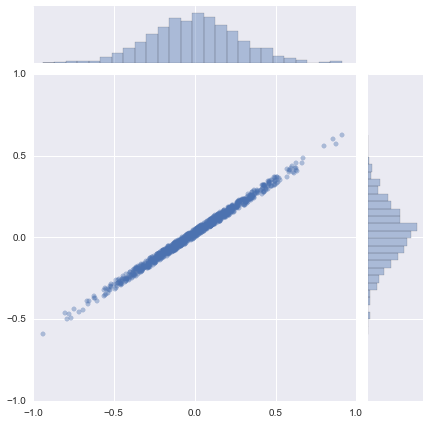

In [5]:
f = plt.figure(figsize=(5, 5))
fig = sb.jointplot(*X.T, stat_func=None, joint_kws=dict(alpha=.4))
f = fig.ax_joint.set_xlim(-1, 1), fig.ax_joint.set_ylim(-1, 1)

#### PCA

Let's find the principal components in this data. Note that we can't have more components than n_features, so we're looking for all two components.

In [6]:
model = PCA(n_components=2)
PCs = model.fit_transform(X)

We can see how much variance is captured by each component.  We see the first PC explains almost all variance.

In [7]:
print model.explained_variance_
print model.explained_variance_ratio_, model.explained_variance_ratio_.sum()  # sums to one

[ 0.10269919  0.0001668 ]
[ 0.99837843  0.00162157] 1.0


We could draw these components in the data

In [8]:
model.components_

array([[ 0.83881658,  0.54441413],
       [-0.54441413,  0.83881658]])

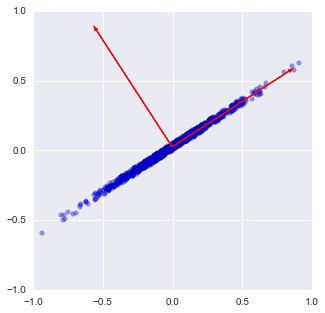

In [9]:
draw_data(X)
for no, component in enumerate(model.components_):
    plt.arrow(model.mean_[0], model.mean_[1], dx=component[0], dy=component[1], color='r', linewidth=1.1)

The components have length one by definition. We could scale them by their standard deviation as well.

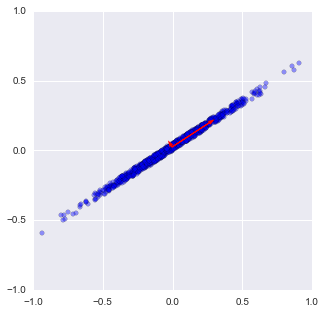

In [10]:
draw_data(X)
std = np.sqrt(model.explained_variance_)
for no, component in enumerate(model.components_):
    plt.arrow(model.mean_[0], model.mean_[1], dx=std[no] * component[0], dy=std[no] * component[1], color='r', linewidth=1.1)

We could plot the data in their new coordinates with respect to these components.

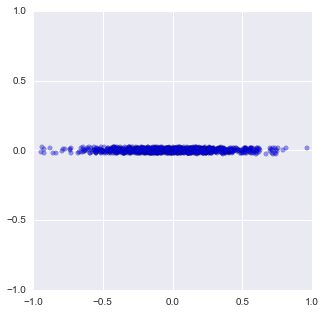

In [11]:
draw_data(PCs)

And we could reconstruct the original points by summing the components.

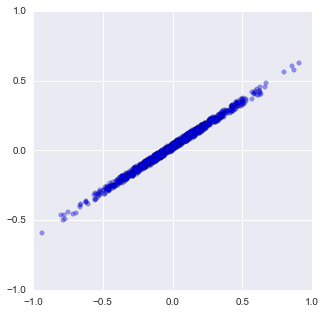

In [12]:
X_rec = model.mean_ + PCs.dot(model.components_)
draw_data(X_rec)

Are these indeed exactly the same? Let's draw their difference.

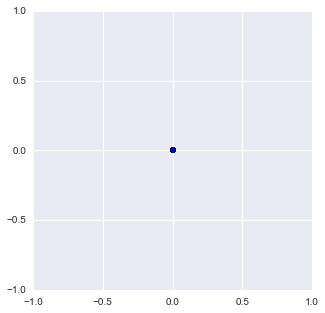

In [13]:
draw_data(X - X_rec)

Yup.